https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html

https://en.wikipedia.org/wiki/Hierarchical_clustering

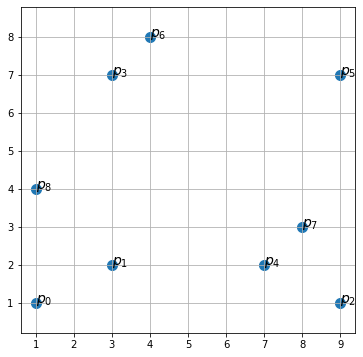

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


P = torch.FloatTensor([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3], [1,4]])

plt.figure(figsize=(6,6))
plt.scatter(*P.T, s=100)
for i, p in enumerate(P, start=0):
    plt.annotate(rf"$p_{i}$", xy=p, size=14)
plt.axis('equal')
plt.grid()
plt.show()

In [2]:
L = sch.linkage(torch.pdist(P, p=2),
                method='centroid',
                metric='euclidean',
                optimal_ordering=True)
L

array([[ 6.        ,  3.        ,  1.41421354,  2.        ],
       [ 7.        ,  4.        ,  1.41421354,  2.        ],
       [ 2.        , 10.        ,  2.12132038,  3.        ],
       [ 1.        ,  0.        ,  2.23606801,  2.        ],
       [ 8.        , 12.        ,  2.69258237,  3.        ],
       [11.        ,  5.        ,  5.09901946,  4.        ],
       [ 9.        , 13.        ,  5.48229481,  5.        ],
       [14.        , 15.        ,  5.96196274,  9.        ]])

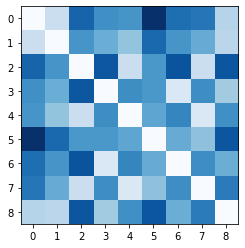

In [3]:
dist = torch.cdist(P, P, p=2)

plt.figure(figsize=(4,4))
plt.imshow(dist, cmap='Blues')
plt.xticks(range(len(P)))
plt.yticks(range(len(P)))
plt.show()

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

button = widgets.Button(description="Button")
out = widgets.Output()

P = []

def on_click_handler(b):
    with out:
        clear_output()
        P.append([random.randint(0,9) for _ in range(2)])

        plt.figure(figsize=(4,4))
        plt.scatter(
            *torch.tensor(P).T
        )
        plt.show()

button.on_click(on_click_handler)

display(button)
display(out)

Button(description='Button', style=ButtonStyle())

Output()

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

slider = widgets.IntSlider(50, 0, 100, 1)
slider.observe()

display(slider)

TypeError: observe() missing 1 required positional argument: 'handler'